In [1]:
%run func_def.ipynb

imports loaded.

Pre-Processing func:
********************
    get_height(item)
    get_weight(item)
    get_reach(item)
    get_std_reach(item, height, reach_list, height_list)
    get_age(item)
    get_std_age(item, age_list)
    get_winning_perc(name, date, df)
    get_lose_streak_data_frame(name, date, df)
    get_win_streak_data_frame(name, date, df)
    get_streak_data_frame(name, date, df)
    get_win_streak(name, date, df)
    get_lose_streak(name, date, df)
    get_fighter_stats(name, data )
    add_columns(data, column_list)

Feature Engineering func:
*************************
    get_stat(index, data, stat='height', fo='')
    get_swaped_row(index, data)
    get_wins(combo, data)
    get_wins_ratio(combo, data)

fight_stats_model_training func:
********************************
    get_sig_features(data, sig_r)
    get_r_score(X, y)
    set_train_test(X_columns, y_columns, data, test_size=0.3, valid_size=0.3)
    set_knn_reg(X_columns, y_columns, data, n=5)
    set_prediction

### <span style='color:green'> **[done]** </span>Loading Feature's-ready data

In [2]:
loc = '../data/'
file = 'ufc_data_features.csv'
df = pd.read_csv(loc+file)
df = df[df.columns[1:]]
df.tail(3)

,result,fighter,opponent,date,weight class,method,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
6826,lose,Kailin Curran,Aleksandra Albu,2017-07-29,Women's Strawweight,U-DEC:,-0.00892,0.123128,-1.597639,0.008337,-0.150322,0.248259,-0.545754,0.199566,-0.613584,-0.320786,-0.491150,1.249440,-0.054481,-2.040434,-0.589427,2.164739
6827,win,Jarred Brooks,Eric Shelton,2017-07-29,Flyweight,S-DEC:,-0.00892,-0.176583,1.561212,0.008337,0.950517,0.213119,0.767752,0.391150,-0.305805,0.329644,-0.129731,-0.099707,1.584492,0.005137,-0.017747,-1.062286
6828,win,Drew Dober,Joshua Burkman,2017-07-29,Lightweight,KO/TKO:Punch,1.34476,0.123128,-0.018213,0.008337,-1.012090,-0.665378,-0.579434,-0.183603,1.094906,-0.239482,0.783004,-0.015385,1.671822,0.132985,-0.017747,-2.137961


In [3]:
req_data = ['date','fighter','opponent','result']
y = ['kd_dif','str_dif','td_dif','sub_dif']
X = ['td avg._dif',
     'td acc._dif',
     'td def._dif',
     'sub. avg._dif',
     'slpm_dif',
     'str. acc._dif',
     'sapm_dif',
     'str. def_dif',
     'stance_win_ratio',
     'win_perc_dif',
     'win_strk_dif',
     'lose_strk_dif']
df = df[req_data + y + X]
df.head(3)

,date,fighter,opponent,result,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
0,2022-09-03,Tai Tuivasa,Ciryl Gane,lose,-0.00892,-3.061301,-0.018213,0.008337,-0.344915,-0.735658,-0.107919,-0.470979,-0.657553,-0.808609,1.358824,-1.448854,1.671822,-0.378408,2.840653,-1.062286
1,2022-09-03,Robert Whittaker,Marvin Vettori,win,-0.00892,1.509291,0.376643,0.008337,-0.595105,-0.243700,0.329916,-0.566771,0.152724,-0.158179,-0.190989,0.153258,-1.281305,0.132985,-0.589427,1.089064
2,2022-09-03,Joaquin Buckley,Nassourdine Imavov,lose,-0.00892,-0.214047,-0.807926,-1.691263,0.305581,0.283399,-0.208958,-1.620484,-0.305805,-1.540343,-0.166486,-0.352672,1.671822,-0.097141,0.553933,0.013389


### <span style='color:green'> **[done]** </span>Feature's significanse:

---------------------------------------------
Correlation Report: Most significant features
---------------------------------------------
R coef > Median R: [0.19, 0.42, 0.26, 0.31, 0.28, 0.58, 0.19, 0.19, 0.39]
Most significant: ['sapm_dif', 'slpm_dif', 'str. acc._dif', 'str. def_dif', 'td def._dif', 'sub. avg._dif', 'td acc._dif', 'td avg._dif', 'td def._dif']


y,kd_dif,str_dif,sub_dif,td_dif
X,,,,
lose_strk_dif,0.05,0.04,0.0,0.0
sapm_dif,0.05,0.31,0.01,0.14
slpm_dif,0.17,0.42,0.03,0.04
stance_win_ratio,0.05,0.03,0.02,0.02
str. acc._dif,0.11,0.26,0.04,0.08
str. def_dif,0.09,0.28,0.05,0.11
sub. avg._dif,0.07,0.04,0.39,0.04
td acc._dif,0.05,0.15,0.01,0.19
td avg._dif,0.08,0.09,0.04,0.58


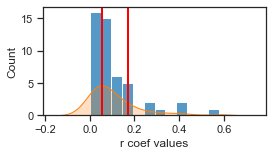

In [4]:
rdf = pd.DataFrame(columns=['y','X','r_coef'])
r_list = []
y_columns = ['kd_dif','str_dif','td_dif','sub_dif']
i = 0 
for y_column in y_columns:
    for x_column in X:
        rdf.loc[i, 'X'] = x_column
        rdf.loc[i, 'y'] = y_column
        rdf.loc[i, 'r_coef'] = np.round(np.abs(get_r_score(X=df[x_column], y=df[y_column])),2)
        r_list.append(rdf.loc[i, 'r_coef'])
        i += 1

rdf = rdf.pivot('X','y','r_coef')
print('---------------------------------------------')
print('Correlation Report: Most significant features')
print('---------------------------------------------')

sig_r =  [r for r in r_list if (r > (np.median(r_list)+np.std(r_list)) and r < 1)]
sig_features = get_sig_features(data=rdf, sig_r=sig_r)
print('R coef > Median R: %s' %(sig_r))
print('Most significant: %s' %(sig_features) )

g = plt.figure(figsize=(4,2))
g = sns.histplot(x = r_list, bins=len(rdf))
g = sns.kdeplot(x = r_list, fill=True)
plt.axvline(x = np.median(r_list)+np.std(r_list), color='red')
plt.axvline(x = np.median(r_list), color='red')
plt.xlabel("r coef values")
plt.ylabel("Count")

rdf

### <span style='color:green'> **[done]** </span> KNN regression model training:

#### <span style='color:green'> **[done]** </span> splitting data:

In [5]:
df = set_train_test(X_columns=X, y_columns=y, data=df, test_size=0.3, valid_size=0.3)
df.tail(3)

Data split: Data=(6829, 21), train_set=(3349, 12), validation_set=(1423, 12), test_set=(2057, 12)


,set,date,fighter,opponent,result,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
6826,train,2017-07-29,Kailin Curran,Aleksandra Albu,lose,-0.00892,0.123128,-1.597639,0.008337,-0.150322,0.248259,-0.545754,0.199566,-0.613584,-0.320786,-0.491150,1.249440,-0.054481,-2.040434,-0.589427,2.164739
6827,train,2017-07-29,Jarred Brooks,Eric Shelton,win,-0.00892,-0.176583,1.561212,0.008337,0.950517,0.213119,0.767752,0.391150,-0.305805,0.329644,-0.129731,-0.099707,1.584492,0.005137,-0.017747,-1.062286
6828,test,2017-07-29,Drew Dober,Joshua Burkman,win,1.34476,0.123128,-0.018213,0.008337,-1.012090,-0.665378,-0.579434,-0.183603,1.094906,-0.239482,0.783004,-0.015385,1.671822,0.132985,-0.017747,-2.137961


#### <span style='color:green'> **[done]** </span> KNN reg Parameter Tunning:

In [6]:
knn_grad = pd.DataFrame(columns=['neighbors','kd_dif rmse','str_dif rmse','td_dif rmse','sub_dif rmse','total_rmse'])

for n in tqdm(np.arange(1,30,2)):
    knn_grad = pd.concat([knn_grad,get_grad_descent_step(alpha=0.01, X_columns=X, y_columns=y, data=df, n=n)], ignore_index=True)

knn_grad

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:23<00:00,  1.58s/it]


,neighbors,kd_dif rmse,str_dif rmse,td_dif rmse,sub_dif rmse,total_rmse
0,1,0.1682,0.1238,0.1512,0.1506,0.5938
1,3,0.1337,0.1004,0.1256,0.1245,0.4842
2,5,0.1274,0.0942,0.1200,0.1196,0.4612
3,7,0.1244,0.0922,0.1174,0.1164,0.4504
4,9,0.1224,0.0902,0.1154,0.1144,0.4424
5,11,0.1205,0.0892,0.1143,0.1130,0.4370
6,13,0.1202,0.0886,0.1127,0.1123,0.4338
7,15,0.1195,0.0882,0.1118,0.1115,0.4310
8,17,0.1187,0.0876,0.1110,0.1107,0.4280
9,19,0.1183,0.0878,0.1110,0.1105,0.4276


In [7]:
df.tail(3)

,set,date,fighter,opponent,result,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,kd_dif_pred,str_dif_pred,td_dif_pred,sub_dif_pred
6826,train,2017-07-29,Kailin Curran,Aleksandra Albu,lose,-0.00892,0.123128,-1.597639,0.008337,-0.150322,0.248259,-0.545754,0.199566,-0.613584,-0.320786,-0.491150,1.249440,-0.054481,-2.040434,-0.589427,2.164739,-0.102277,-0.102277,-0.102277,-0.102277
6827,train,2017-07-29,Jarred Brooks,Eric Shelton,win,-0.00892,-0.176583,1.561212,0.008337,0.950517,0.213119,0.767752,0.391150,-0.305805,0.329644,-0.129731,-0.099707,1.584492,0.005137,-0.017747,-1.062286,-0.055599,-0.055599,-0.055599,-0.055599
6828,test,2017-07-29,Drew Dober,Joshua Burkman,win,1.34476,0.123128,-0.018213,0.008337,-1.012090,-0.665378,-0.579434,-0.183603,1.094906,-0.239482,0.783004,-0.015385,1.671822,0.132985,-0.017747,-2.137961,0.271152,0.271152,0.271152,0.271152


<AxesSubplot:xlabel='neighbors', ylabel='total_rmse'>

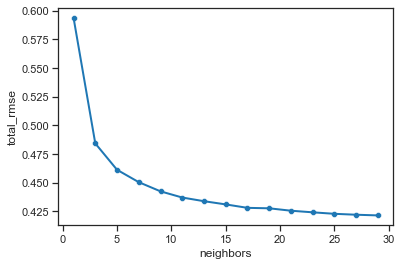

In [8]:
sns.scatterplot(data=knn_grad, x='neighbors', y='total_rmse')
sns.lineplot(data=knn_grad, x='neighbors', y='total_rmse')

In [9]:
opt_n = np.min(knn_grad.neighbors[knn_grad.total_rmse==np.min(knn_grad.total_rmse)])
print('best performance n: %d' %opt_n)
knn_grad[knn_grad.total_rmse==np.min(knn_grad.total_rmse)]

best performance n: 29


,neighbors,kd_dif rmse,str_dif rmse,td_dif rmse,sub_dif rmse,total_rmse
14,29,0.116,0.0865,0.1101,0.1088,0.4214


### <span style='color:green'> **[done]** </span> Model evaluation:

In [10]:
rmse = 0
for stat in ['kd','str','td','sub']:
    rmse += get_rmse(act=df[stat + '_dif'][df.set=='test'], pred=df[stat + '_dif_pred'][df.set=='test'])
print('Model Accuracy: %f' %(1-rmse))    

Model Accuracy: 0.641900


#### <span style='color:green'> **[done]** </span> Saving data:

In [11]:
param = pd.DataFrame(data={'ml_model':['knn_reg'],
                          'parameter_name':['neighbors'],
                          'value':[opt_n],
                          'accuracy':[1-rmse]}
                    )

param.to_csv('../global_variables/ml_models_parameters.csv')
print('../global_variables/ml_models_parameters.csv saved.')

../global_variables/ml_models_parameters.csv saved.


In [12]:
df.to_csv('../data/fight_stat_data_trained.csv')
print('../data/fight_stat_data_trained.csv saved.')

../data/fight_stat_data_trained.csv saved.
